In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

d = pd.read_csv("combined.csv")
d2 = d[(d['SourcenumRecordsOutPerSecond_avg'] >= (d['rate'] * 0.95))]
d2['ratek'] = d2['rate']/1000


/tmp/ipykernel_138283/4108075689.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['ratek'] = d2['rate']/1000


~~~
[INFO] Input: MPOLICY ondemand
[INFO] Input: MQUERY query5
[INFO] Input: DVFS 0c00 0e00 1000 1200 1400 1600 1800 1a00
[INFO] Input: ITRS 2 100 200 300 400 500 600 700 800 900 1000
[INFO] Input: NITERS 0
[INFO] Input: FLINK_RATE 6000_300000 12000_300000 18000_300000 24000_300000
[INFO] Input: FLINK_RATE_TYPE static
[INFO] Input: BUFF -1
[INFO] Input: NCORES 16
[INFO] Input: IPWINDOW 10.10.1.3
[INFO] Input: MCFG 1;4;16 1;8;16 1;12;16 1;16;16
[INFO] Input: WINDOW_LENGTH 20
[INFO] Input: FLINK_CHECKPOINTING_ENABLED true
[INFO] Input: FLINK_CHECKPOINTING_INTERVAL 5000 10000 15000
[INFO] Input: FLINK_CHECKPOINTING_MODE exactly_once atleast_once
[INFO] Input: FLINK_ROCKSDB_STATE_BACKEND_ENABLED true
~~~

In [2]:
d2.columns

Index(['Unnamed: 0', 'i', 'itr', 'dvfs', 'rate', 'policy', 'nwindows',
       'CheckpointInterval', 'CheckpointMode', 'pkg_watts_avg',
       'pkg_watts_std', 'ram_watts_avg', 'ram_watts_std',
       'SinknumRecordsInPerSecond_avg', 'SinknumRecordsInPerSecond_std',
       'SinknumRecordsOutPerSecond_avg', 'SinknumRecordsOutPerSecond_std',
       'SinkbusyTimeMsPerSecond_avg', 'SinkbusyTimeMsPerSecond_std',
       'SinkbackPressuredTimeMsPerSecond_avg',
       'SinkbackPressuredTimeMsPerSecond_std', 'SinkbusyTime_%',
       'SinkbackPressuredTime_%', 'SourcenumRecordsInPerSecond_avg',
       'SourcenumRecordsInPerSecond_std', 'SourcenumRecordsOutPerSecond_avg',
       'SourcenumRecordsOutPerSecond_std', 'SourcebusyTimeMsPerSecond_avg',
       'SourcebusyTimeMsPerSecond_std',
       'SourcebackPressuredTimeMsPerSecond_avg',
       'SourcebackPressuredTimeMsPerSecond_std', 'SourcebusyTime_%',
       'SourcebackPressuredTime_%', 'WindownumRecordsInPerSecond_avg',
       'WindownumRecordsIn

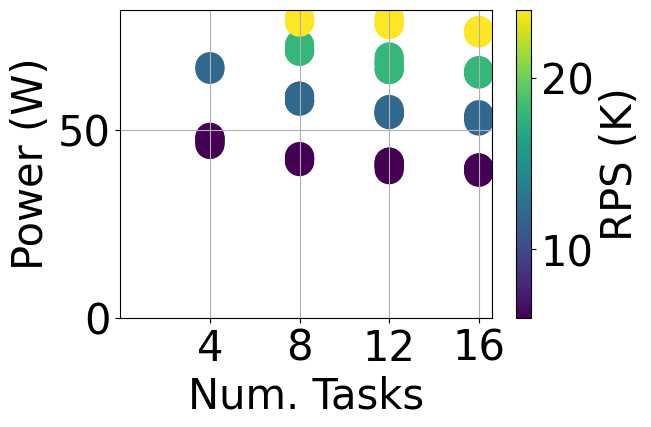

In [4]:
plt.rcParams['figure.figsize'] = 6,4
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels

plt.scatter(d2['nwindows'], d2['pkg_watts_avg'], c=d2['ratek'], cmap='viridis', s=400)
plt.colorbar(label='RPS (K)')
plt.xticks(d2.nwindows.unique())
plt.xlabel('Num. Tasks')
plt.ylabel('Power (W)')
#plt.title('Query5 RocksDB WindowLength 20')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid()
#plt.savefig('q5wl20checkpoints.pdf', bbox_inches='tight')

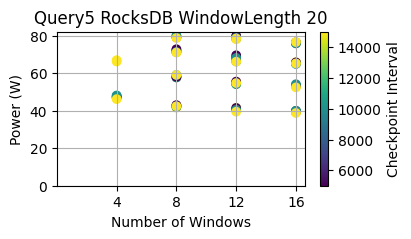

In [5]:
plt.figure(figsize=(4,2))
plt.scatter(d2['nwindows'], d2['pkg_watts_avg'], c=d2['CheckpointInterval'], cmap='viridis')
plt.colorbar(label='Checkpoint Interval')
plt.xticks(d2.nwindows.unique())
plt.xlabel('Number of Windows')
plt.ylabel('Power (W)')
plt.title('Query5 RocksDB WindowLength 20')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid()


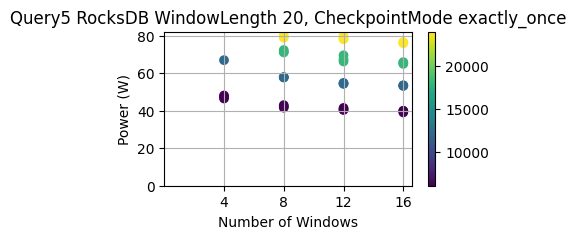

In [8]:
d3 = d2[d2['CheckpointMode'] == 'exactly_once']
plt.figure(figsize=(4,2))
plt.scatter(d3['nwindows'], d3['pkg_watts_avg'], c=d3['rate'], cmap='viridis')
plt.colorbar(label='')
plt.xticks(d3.nwindows.unique())
plt.xlabel('Number of Windows')
plt.ylabel('Power (W)')
plt.title('Query5 RocksDB WindowLength 20, CheckpointMode exactly_once')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid()


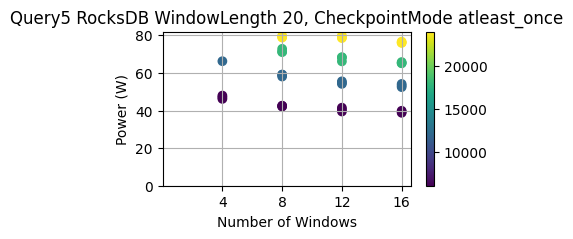

In [9]:
d4 = d2[d2['CheckpointMode'] == 'atleast_once']
plt.figure(figsize=(4,2))
plt.scatter(d4['nwindows'], d4['pkg_watts_avg'], c=d4['rate'], cmap='viridis')
plt.colorbar(label='')
plt.xticks(d4.nwindows.unique())
plt.xlabel('Number of Windows')
plt.ylabel('Power (W)')
plt.title('Query5 RocksDB WindowLength 20, CheckpointMode atleast_once')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid()
